In [1]:
import sys
sys.path.append('..')
from models import DecisionTree, Node, Leaf #type: ignore 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = [
    ['Green'    ,3,'Apple'],
    ['Yellow'   ,3,'Apple'],
    ['Red'      ,1,'Grape'],
    ['Red'      ,1,'Grape'],
    ['Yellow'   ,3,'Lemon'],
]

X = [row[:2] for row in data]
y = [row[2] for row in data]

tree = DecisionTree(X,y)
tree.fit()
tree.predict_training_set()

accuracy = tree.predict_training_set()
sum([row[2] == datarow[2] for row,datarow in zip(accuracy,data)])/len(data)

0.8

In [2]:
tree.predict_training_set(probabilities=True)

[['Green', 3, {'Apple': 1.0}],
 ['Yellow', 3, {'Lemon': 0.5, 'Apple': 0.5}],
 ['Red', 1, {'Grape': 1.0}],
 ['Red', 1, {'Grape': 1.0}],
 ['Yellow', 3, {'Lemon': 0.5, 'Apple': 0.5}]]

In [3]:
data = [
    ['Green'    ,3,'Sweet','Apple'],
    ['Yellow'   ,3,'Sweet','Apple'],
    ['Red'      ,1,'Sweet','Grape'],
    ['Red'      ,1,'Sweet','Grape'],
    ['Yellow'   ,3,'Sour','Lemon'],
    ['Green'    ,2,'Sour','Lemon'],
    ['Red'      ,2,'Sweet','Apple'],
    ['Yellow'   ,1,'Sour','Grape'],
    ['Green'    ,4,'Sweet','Apple'],
    ['Red'      ,3,'Sour','Lemon'],
    ['Yellow'   ,2,'Sweet','Orange'],
    ['Green'    ,5,'Sour','Grape'],
    ['Red'      ,4,'Sweet','Apple'],
    ['Yellow'   ,5,'Sour','Lemon'],
    ['Green'    ,1,'Sweet','Orange'],
    ['Red'      ,5,'Sour','Grape'],
    ['Yellow'   ,4,'Sweet','Apple'],
    ['Green'    ,3,'Sour','Lemon'],
    ['Red'      ,2,'Sweet','Orange'],
    ['Yellow'   ,1,'Sour','Grape']
]

# X = [row[:3] for row in data]
# y = [row[3] for row in data]
data = pd.DataFrame(data, columns=['Color','Diameter','Taste','Fruit'])
X = data[['Color','Diameter','Taste']]
y = data['Fruit']
X = 1*pd.get_dummies(X)

X = X.values.tolist()
y = y.values.tolist()


tree = DecisionTree(X, y)
tree.fit()
tree.predict_training_set()

accuracy = tree.predict_training_set()
sum([row[-1] == datarow[-1] for row,datarow in zip(accuracy,data.values.tolist())])/len(data)

0.95

In [4]:
tree = DecisionTreeClassifier()
tree.fit(X,y)
tree.score(X,y)

0.95

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn
import pandas as pd

df = pd.read_csv('../data/iris.csv')
df.head()
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]
# 125 training and 25 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1, stratify=y)
tree = DecisionTreeClassifier()
tree.fit(X,y)


#Predict the response for test dataset
y_hat = tree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_hat))
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)


Accuracy: 1.0
[[8 0 0]
 [0 9 0]
 [0 0 8]]


[Text(0.5, 0.9166666666666666, 'petal_width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.25, 'gini = 0.

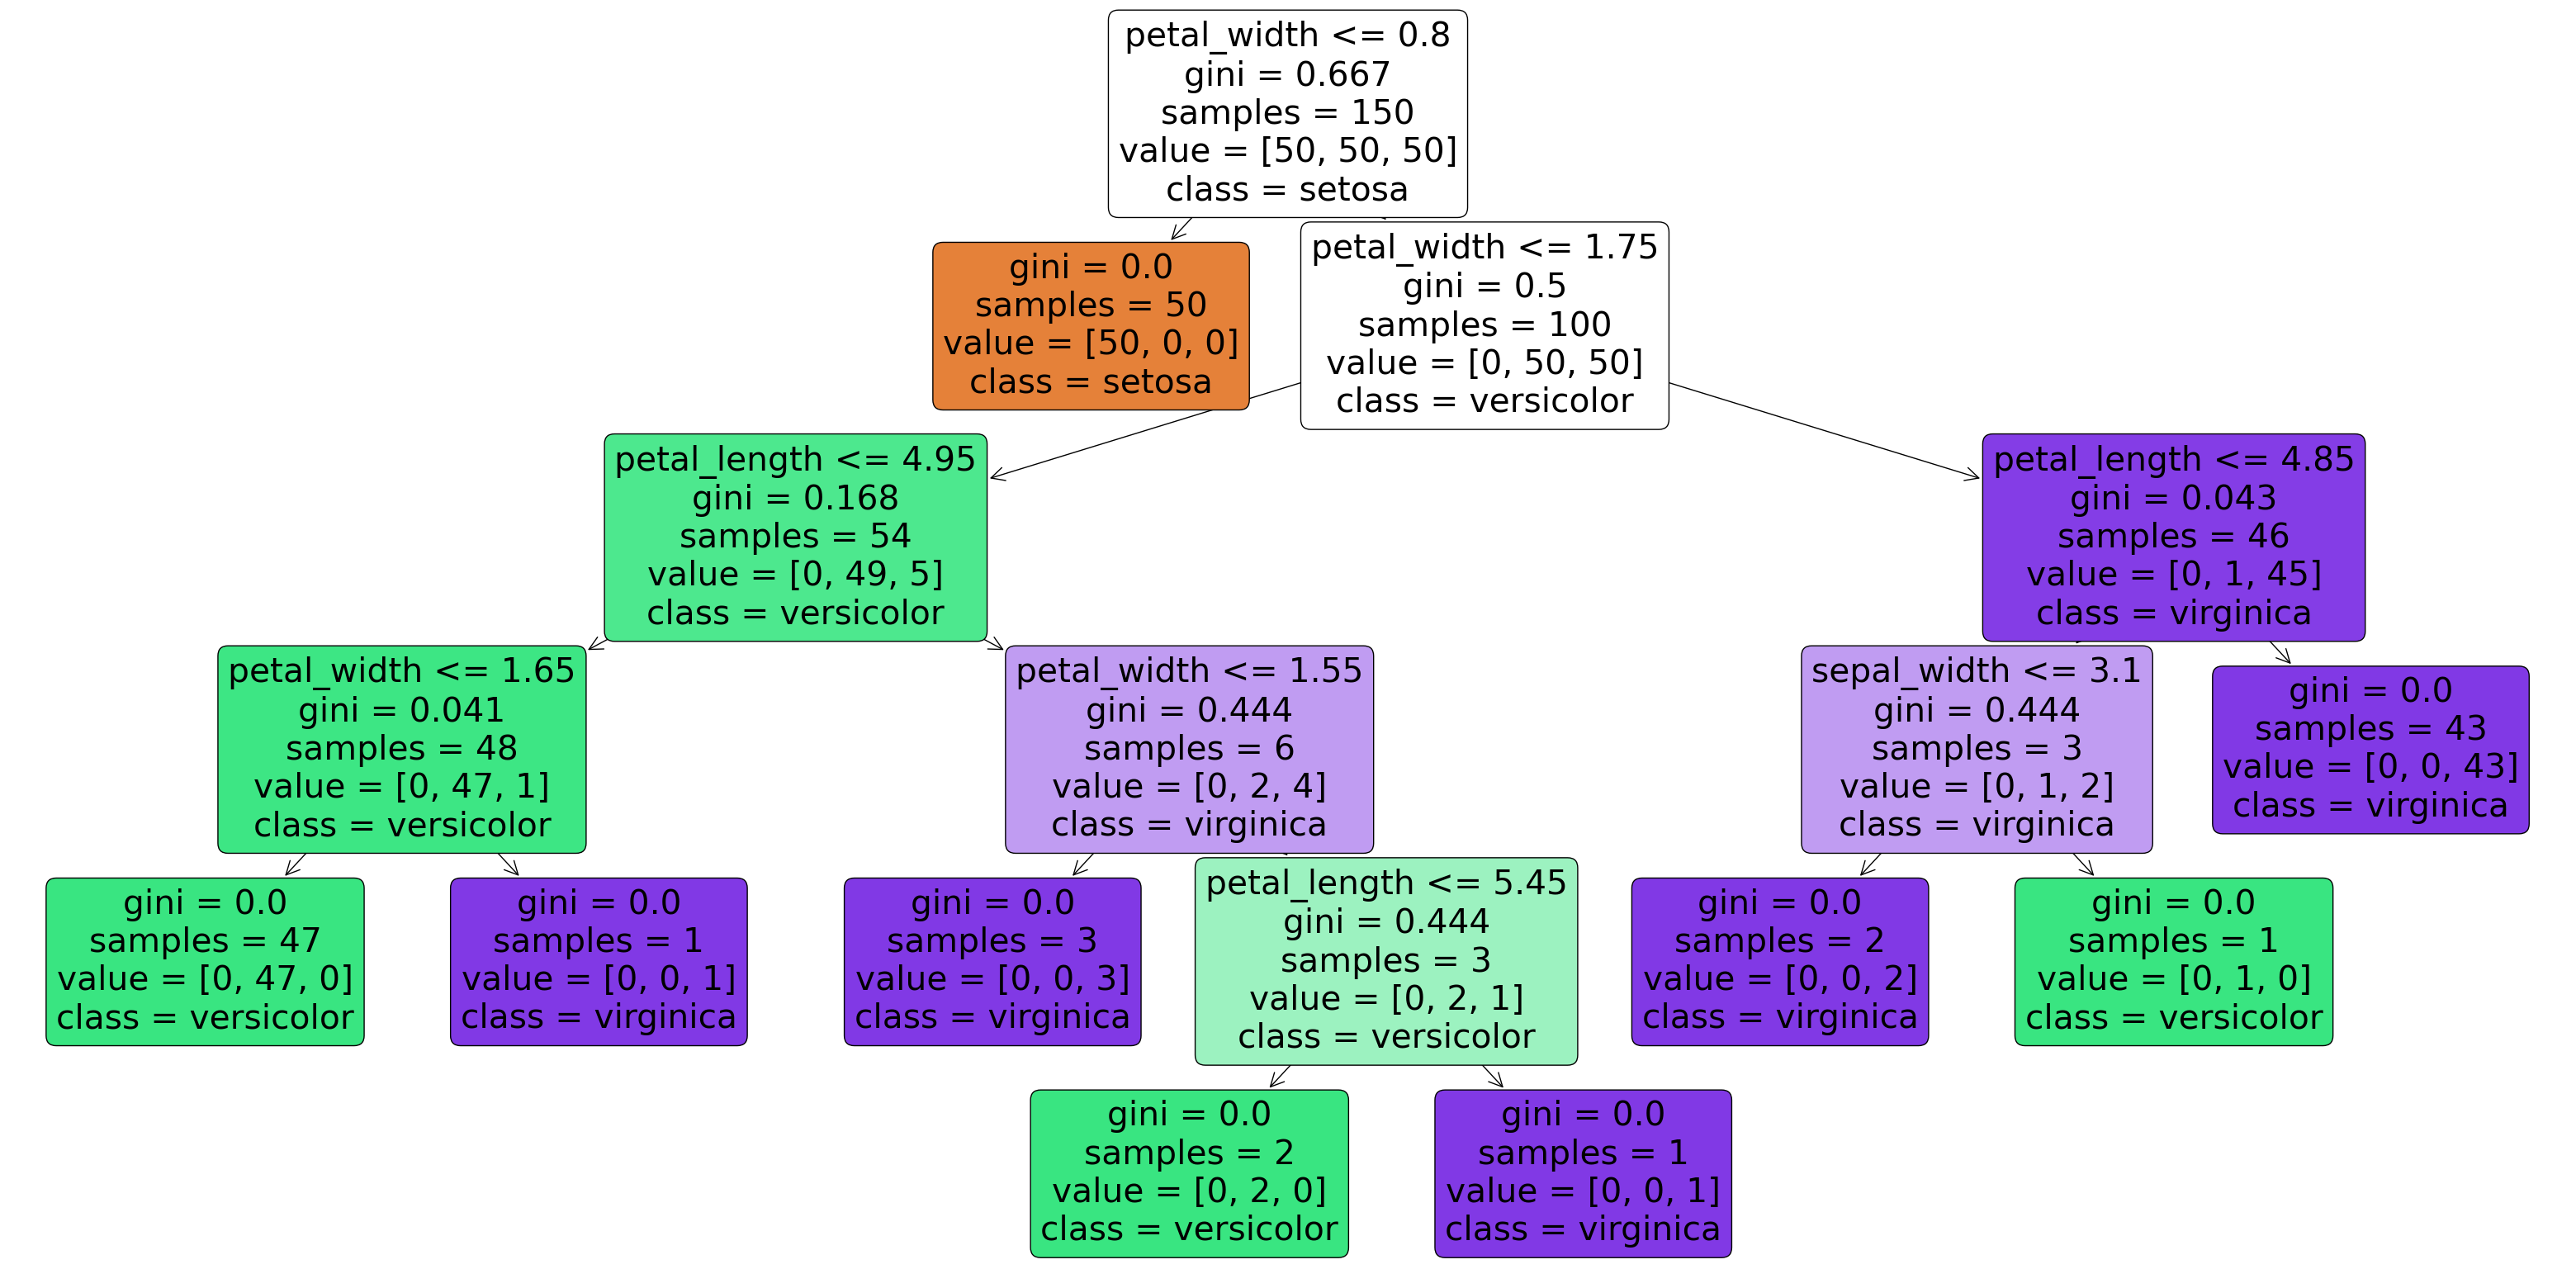

In [6]:
import matplotlib.pyplot as plt


feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]

fig = plt.figure(figsize = (40,20))
sklearn.tree.plot_tree(tree,feature_names=feature_names,class_names=target_names,filled=True, rounded = True)


In [7]:
iris = pd.read_csv('../data/iris.csv')
iris.sort_values(by = iris.columns.to_list(),inplace = True, ignore_index = True, ascending = False)

X = iris.iloc[:,:4].values.tolist()
y = iris.iloc[:,4].values.tolist()

tree = DecisionTree(X,y)
tree.fit()
tree.predict_training_set()

accuracy = tree.predict_training_set()
sum([row[-1] == datarow[-1] for row,datarow in zip(accuracy,iris.values.tolist())])/len(iris)

1.0

In [8]:
tree.visualize(columns = iris.columns.to_list())

Question: petal_length<=2.45
  Question: petal_width<=1.75
    Question: petal_length<=4.85
      Leaf: virginica
      Question: sepal_length<=5.95
        Leaf: virginica
        Leaf: versicolor
    Question: petal_length<=4.95
      Question: petal_width<=1.55
        Question: sepal_length<=6.95
          Leaf: virginica
          Leaf: versicolor
        Leaf: virginica
      Question: petal_width<=1.65
        Leaf: virginica
        Leaf: versicolor
  Leaf: setosa


Lab - Decision Trees

```

Q1. GINI Calculations
    • Calculate the GINI value for a node with a 9/7 split (9 instances of class1, 7 
    instances of class2)
    • Calculate the GINI values of the nodes with a 1 / 4 split, 2/1 split and 1/1 split
    • Calculate the overall GINI value of a split into the above three nodes (weighted sum
    of the individual GINI values)
```

In [9]:
def get_gini_value(labels:list[str])->float:
    gini:float = 1.0
    count:int = len(labels)

    for label in set(labels):
        gini -= (labels.count(label)/count)**2
    
    return gini
def print_results(labels:list[str])->None:
    gini_value = get_gini_value(labels)
    print(labels)
    print('gini value {:.2f}'.format(gini_value))
    print('\n')


labels1 = ['class1']*9 + ['class2']*7
print_results(labels1)
gini1 = get_gini_value(labels1)

labels2 = ['class1']*1 + ['class2']*4
print_results(labels2)
gini2 = get_gini_value(labels2)

labels3 = ['class1']*2 + ['class2']*1
print_results(labels3)
gini3 = get_gini_value(labels3)

labels4 = ['class1']*1 + ['class2']*1
print_results(labels4)
gini4 = get_gini_value(labels4)

total = len(sum([labels1,labels2,labels3,labels4],[]))

(len(labels1)*gini1+len(labels2)*gini2+len(labels3)*gini3+len(labels4)*gini4)/total

['class1', 'class1', 'class1', 'class1', 'class1', 'class1', 'class1', 'class1', 'class1', 'class2', 'class2', 'class2', 'class2', 'class2', 'class2', 'class2']
gini value 0.49


['class1', 'class2', 'class2', 'class2', 'class2']
gini value 0.32


['class1', 'class1', 'class2']
gini value 0.44


['class1', 'class2']
gini value 0.50




0.45416666666666666

```
Q2. Decision Tree for Iris data.
    • Load iris data from CSV file
    • Split into training and test data
    • Fit to a DecisionTreeClassifier with max_depth=2
    • Find the accuracy and confusion matrix.
    • Plot the decision tree.
    • Experiment with different values of max_depth. 

```

In [10]:
data = pd.read_csv('../data/iris.csv')
X,y = data.drop(columns = 'species').values,data.species.values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

print(tree.score(X,y))
confusion_matrix(y,tree.predict(X))




0.96


array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

```
Q3. Decision Tree – Diabetes Data
Create a decision tree model for the diabetes data set. The diabetes data set has no 
column headers. 
# How to read a csv file with no column names and set the names of the Dtaframe

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
    • Load diabetes data from CSV file
    • Split into training and test data
    • Fit to a DecisionTreeClassifier. 
    • Find the accuracy and confusion matrix.
    • Plot the decision tree.
Experiment with different values of max_depth. 

```

In [11]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('../data/diabetes.csv',header = None, names = col_names)

X,y = data.drop(columns = 'label').values,data.label.values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X,y)

print(tree.score(X,y))
confusion_matrix(y,tree.predict(X))

## my homegrown tree
my_tree = DecisionTree(X.tolist(),y.tolist())
my_tree.fit()
accuracy = my_tree.predict_training_set()
sum([row[-1] == datarow[-1] for row,datarow in zip(accuracy,data.values.tolist())])/len(data)


1.0


1.0

In [12]:
my_tree.visualize(columns = data.columns.to_list())

Question: glucose<=127.5
  Question: bmi<=29.95
    Question: glucose<=157.5
      Question: insulin<=629.5
        Question: bp<=65.0
          Leaf: 0
          Leaf: 1
        Question: pedigree<=0.3005
          Question: age<=44.0
            Question: pregnant<=6.5
              Leaf: 1
              Question: age<=51.0
                Question: pregnant<=0.5
                  Leaf: 1
                  Leaf: 0
                Leaf: 0
            Leaf: 1
          Question: pedigree<=0.2885
            Leaf: 0
            Question: age<=37.5
              Question: age<=56.5
                Question: pregnant<=6.5
                  Leaf: 0
                  Leaf: 1
                Leaf: 1
              Question: skin<=28.0
                Question: glucose<=168.0
                  Leaf: 1
                  Leaf: 0
                Question: glucose<=171.0
                  Leaf: 0
                  Leaf: 1
      Question: age<=30.5
        Question: pedigree<=0.4295
          Quest

[Text(0.48714967757936506, 0.9642857142857143, 'glucose <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]\nclass = 0'),
 Text(0.20594618055555555, 0.8928571428571429, 'age <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]\nclass = 0'),
 Text(0.10863095238095238, 0.8214285714285714, 'bmi <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]\nclass = 0'),
 Text(0.07242063492063493, 0.75, 'bmi <= 30.95\ngini = 0.139\nsamples = 267\nvalue = [247, 20]\nclass = 0'),
 Text(0.023809523809523808, 0.6785714285714286, 'pregnant <= 7.5\ngini = 0.026\nsamples = 151\nvalue = [149, 2]\nclass = 0'),
 Text(0.015873015873015872, 0.6071428571428571, 'pedigree <= 0.672\ngini = 0.013\nsamples = 150\nvalue = [149, 1]\nclass = 0'),
 Text(0.007936507936507936, 0.5357142857142857, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]\nclass = 0'),
 Text(0.023809523809523808, 0.5357142857142857, 'pedigree <= 0.686\ngini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = 0'),
 Text(0.015873015873015872, 0.4642

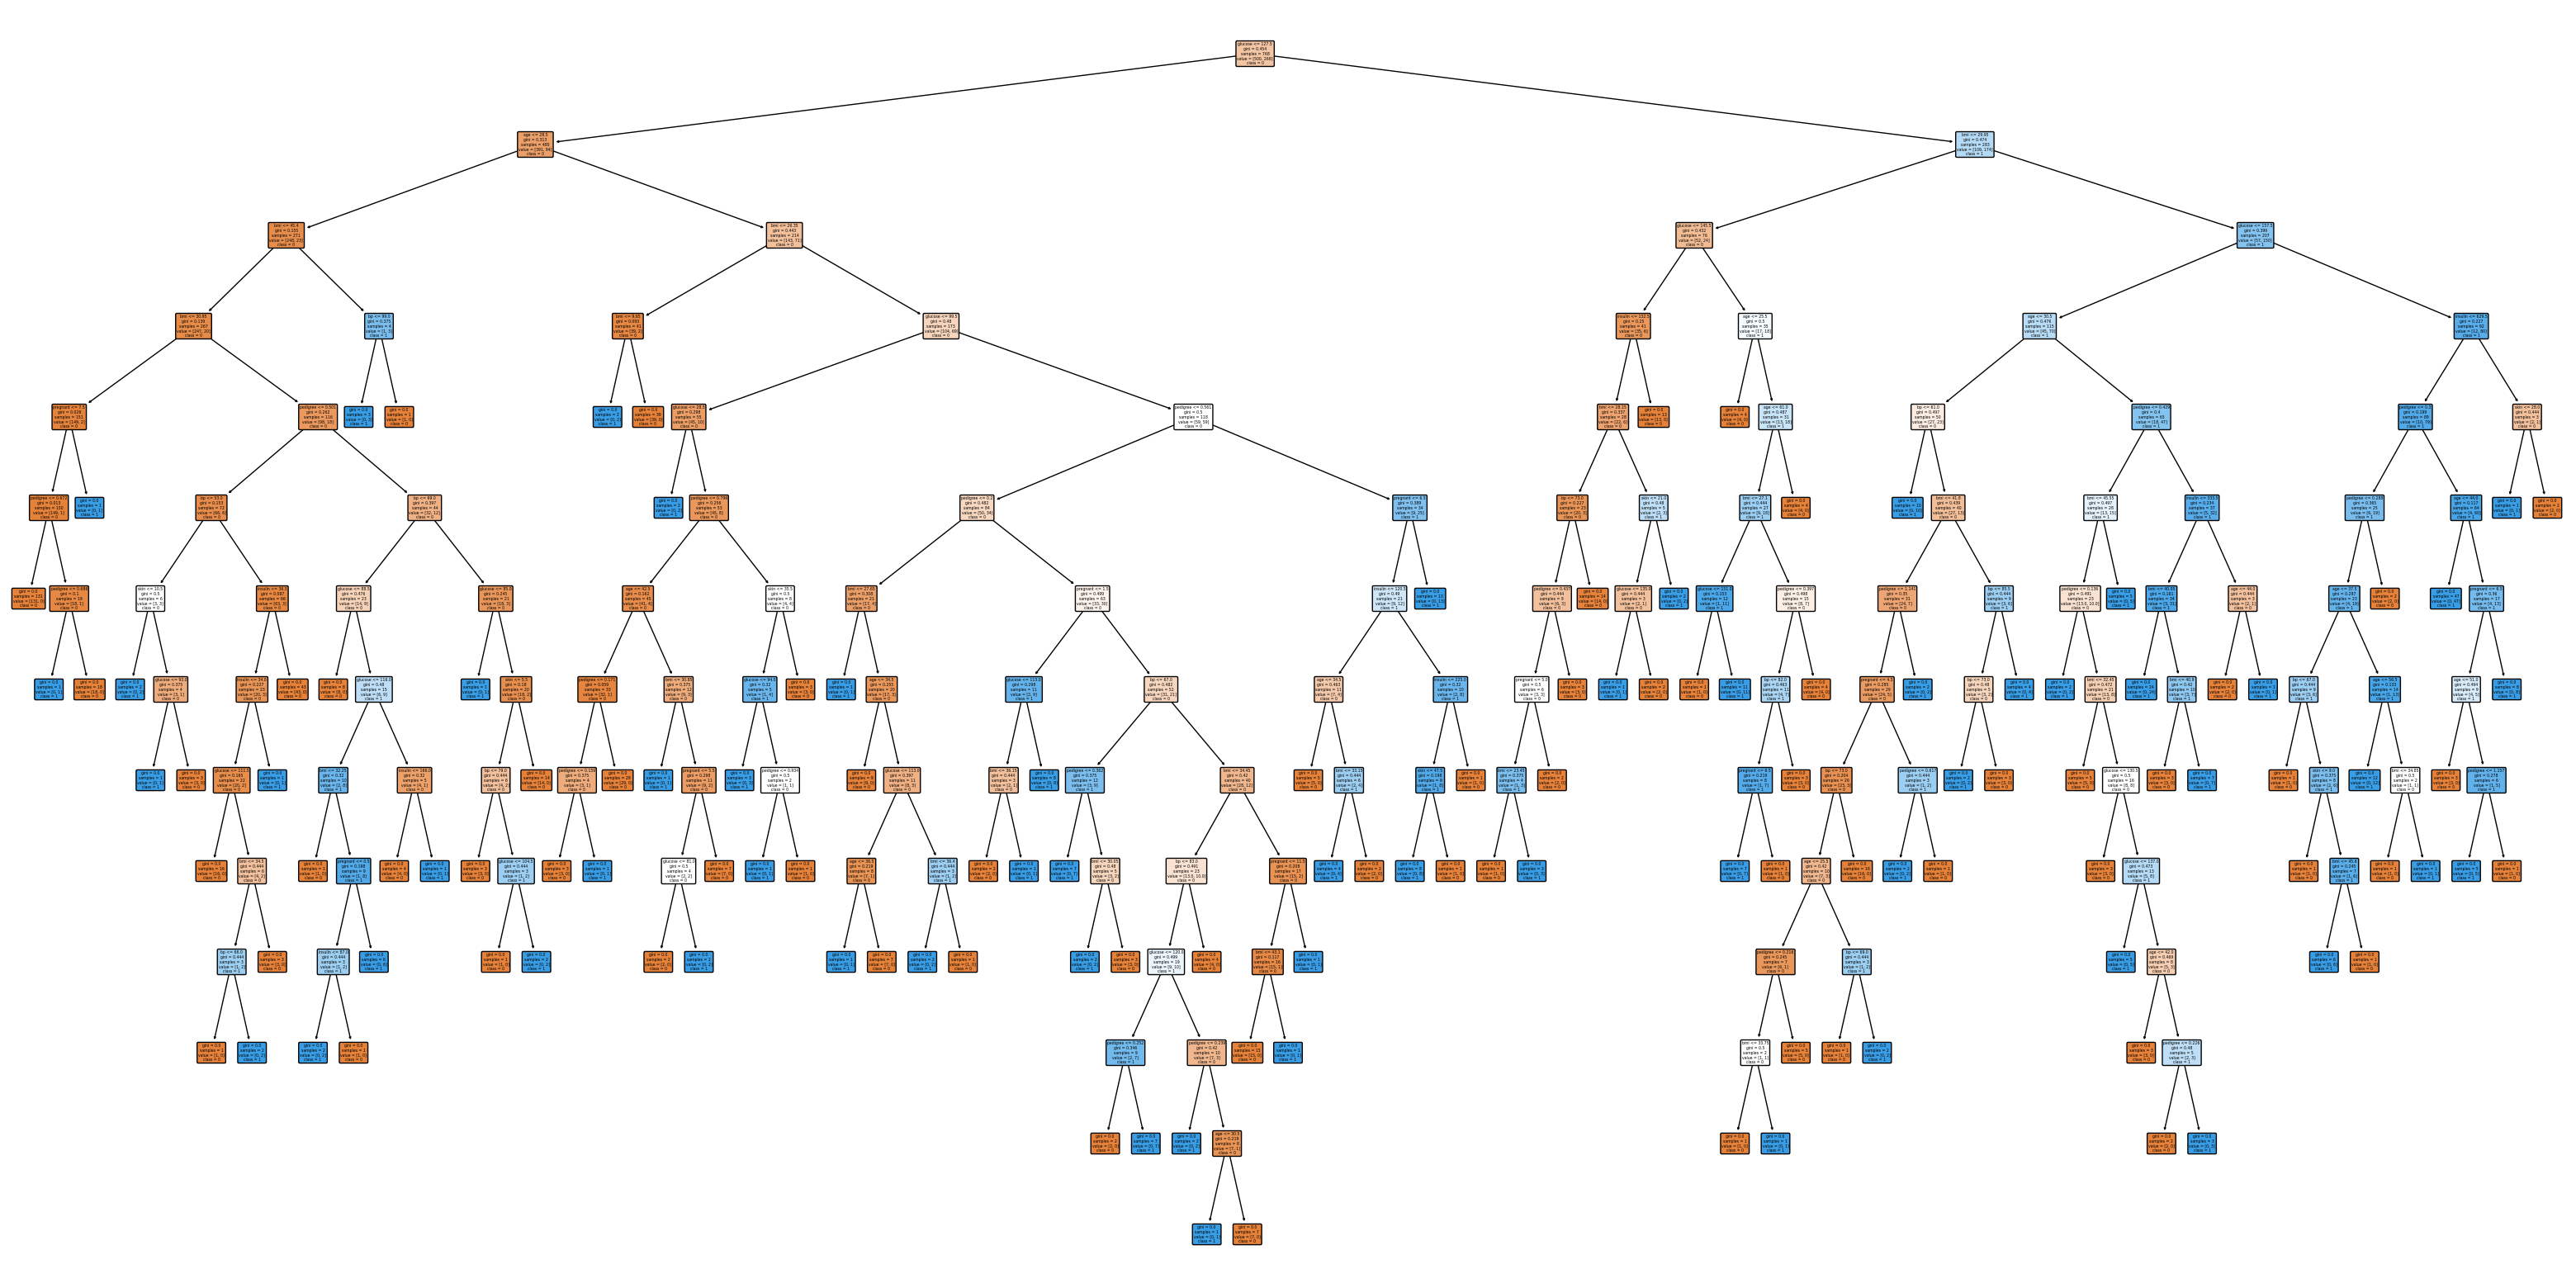

In [13]:
#plot
fig = plt.figure(figsize = (40,20))
sklearn.tree.plot_tree(tree,feature_names=col_names[:-1],class_names=['0','1'],filled=True, rounded = True)



In [14]:
my_tree.depth

13

```
Q4. Decision Tree – Iris Cross Validation
    • Build a DecisionTreeClassifier for the iris data set and use cross validation to pick 
    the optimal value of max_depth
```

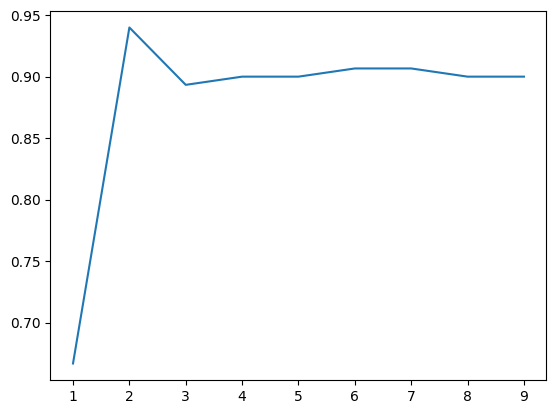

In [15]:
# Q4. Decision Tree – Iris Cross Validation
#     • Build a DecisionTreeClassifier for the iris data set and use cross validation to pick 
#     the optimal value of max_depth

from sklearn.model_selection import cross_val_score
import numpy as np

tree = DecisionTreeClassifier()

X = iris.iloc[:,:4].values.tolist()
y = iris.iloc[:,4].values.tolist()

scores = cross_val_score(tree,X,y,cv = 50,scoring = 'accuracy')
scores
np.mean(scores)

depths = range(1,10)
means = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree,X,y,cv = 5,scoring = 'accuracy')
    means.append(np.mean(scores))

plt.plot(depths,means)
# 2 is the best depth

```
Q5. Decision Tree – Diabetes Cross Validation
    • Build a DecisionTreeClassifier for the diabetes data set and use cross validation to 
    pick the optimal value of max_depth.
```

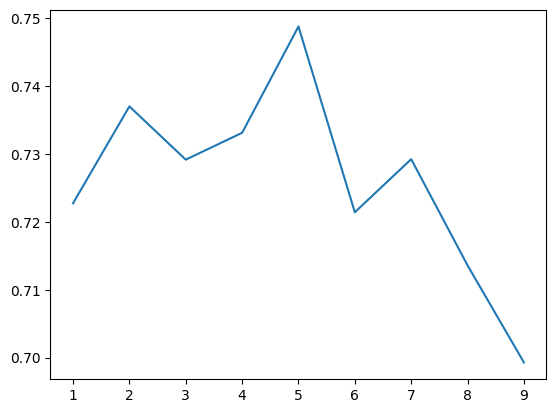

In [16]:
'''
Q5. Decision Tree – Diabetes Cross Validation
    • Build a DecisionTreeClassifier for the diabetes data set and use cross validation to 
    pick the optimal value of max_depth.
'''

X= data.drop(columns = 'label').values
y = data.label.values

tree = DecisionTreeClassifier()
scores = cross_val_score(tree,X,y,cv = 50,scoring = 'accuracy')
scores

np.mean(scores)

depths = range(1,10)
means = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree,X,y,cv = 5,scoring = 'accuracy')
    means.append(np.mean(scores))

plt.plot(depths,means)
# 5 is the best depth


```
Q6. Decision Tree -Mushroom Data
    • Load mushroom data from CSV file
    • One hot ecode the features (X = get_dummies(X))
    • Split into training and test data
    • Fit to a DecisionTreeClassifier. 
    • Use cross validation to determine the optimal depth of the decision tree. 
    • For that depth find the accuracy and confusion matrix and plot the decision tree.
```

Optimal Depth: 9
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


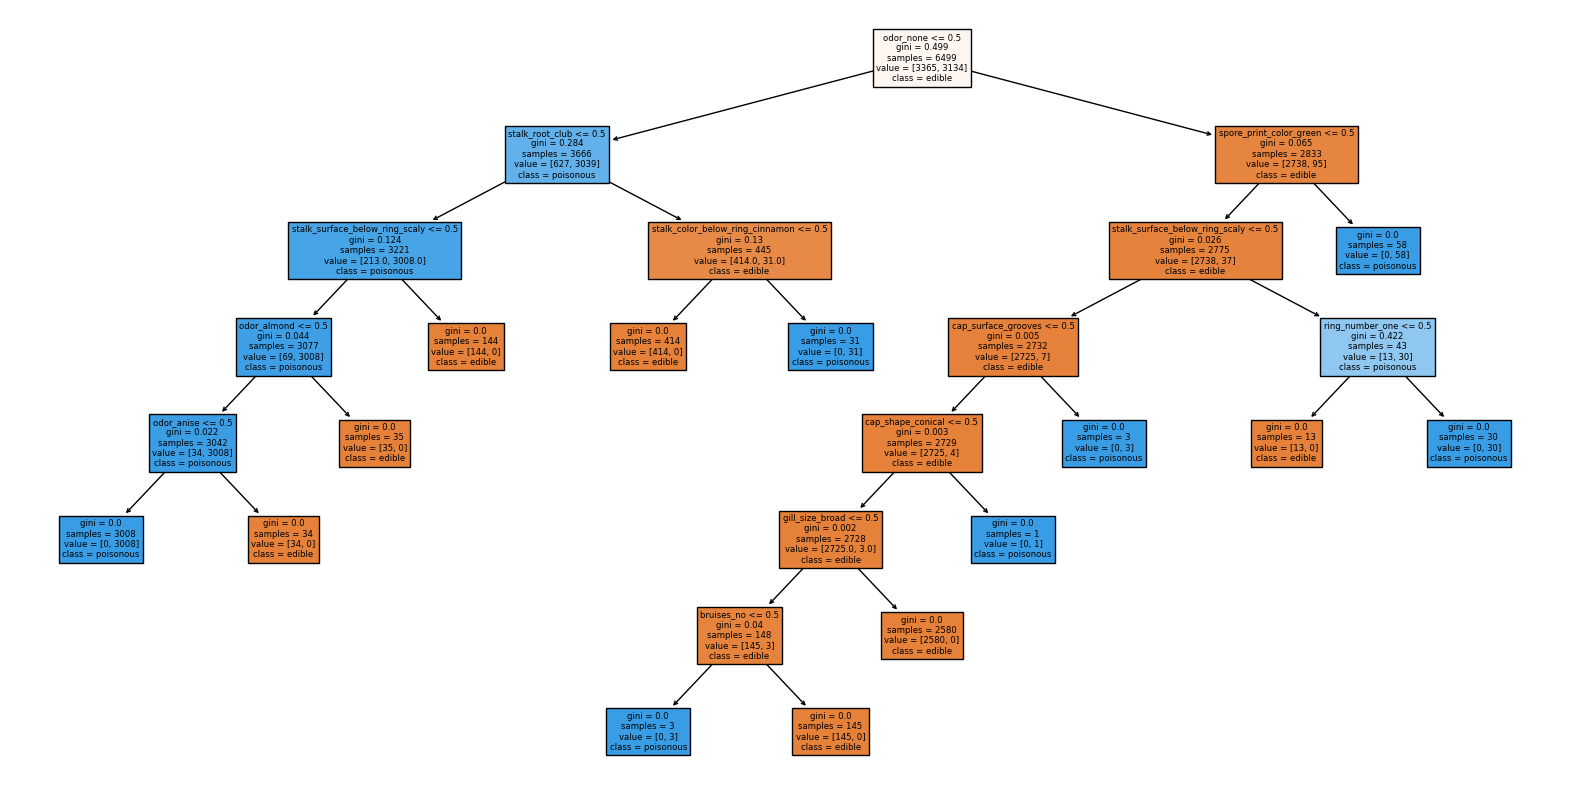

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load mushroom data from CSV file
data = pd.read_csv('../data/mushrooms.csv')

# One-hot encode the features
X = pd.get_dummies(data.drop('type', axis=1))
y = data['type']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit to a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Use cross-validation to determine the optimal depth of the decision tree
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best depth
best_depth = grid_search.best_params_['max_depth']

# Fit the classifier with the optimal depth
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Find the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Optimal Depth: {best_depth}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_,ax = ax)
fig.savefig('..\\plots\\decision_tree.png')

In [18]:
tree = DecisionTree(X.values.tolist(),y.values.tolist())
tree.fit()

accuracy = tree.predict_training_set()
sum([row[-1] == datarow for row,datarow in zip(accuracy,y)])/len(y)

1.0

In [19]:
tree.visualize(columns = X.columns.tolist())

Question: odor_none==False
  Question: spore_print_color_green==False
    Leaf: poisonous
    Question: stalk_surface_below_ring_scaly==False
      Question: gill_size_broad==False
        Leaf: edible
        Leaf: poisonous
      Question: cap_surface_grooves==False
        Leaf: poisonous
        Question: cap_shape_conical==False
          Leaf: poisonous
          Question: gill_size_broad==False
            Leaf: edible
            Question: bruises_no==False
              Leaf: edible
              Leaf: poisonous
  Question: stalk_root_club==False
    Question: bruises_no==False
      Leaf: poisonous
      Leaf: edible
    Question: stalk_root_rooted==False
      Leaf: edible
      Question: odor_almond==False
        Leaf: edible
        Question: odor_anise==False
          Leaf: edible
          Leaf: poisonous
